1. Adjust rand index (ARI)
2. Normalized mutual information (NMI)

In [1]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from itertools import chain

In [2]:
X_raw, y = make_moons(n_samples=200,noise=0.05, random_state=0)

In [3]:
scaler = StandardScaler()
scaler.fit(X_raw)
X = scaler.transform(X_raw)

In [4]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS, AffinityPropagation

algorithms = {'kmeans': KMeans(n_clusters=2), 
             'agg': AgglomerativeClustering(n_clusters=2),
              'dbscan': DBSCAN(),
             'optics': OPTICS(),
             'affinity': AffinityPropagation()}

In [5]:
# Run kmeans, agglomerative and optics
a_clusters = {}
for key in algorithms:
    algorithm = algorithms[key]
    a_clusters[key] = algorithm.fit_predict(X)

In [6]:
# Create a random cluster assigment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
a_clusters['random'] = random_clusters

In [7]:
# Calculate ARI metric
a_ARI = {}
for key in a_clusters:
    clusters = a_clusters[key]
    ARI = adjusted_rand_score(y, clusters)
    a_ARI[key] = ARI
    print(f'Technique:{key} ARI: {ARI}')

Technique:kmeans ARI: 0.5015957062647948
Technique:agg ARI: 0.6065184066117171
Technique:dbscan ARI: 1.0
Technique:optics ARI: 0.04621680726356789
Technique:affinity ARI: 0.1980676989918628
Technique:random ARI: 0.0030909075298446473


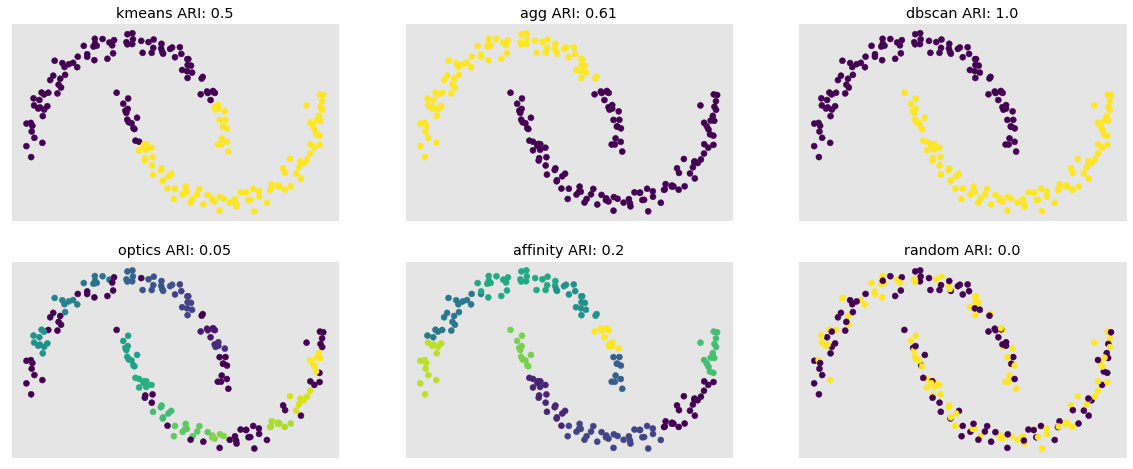

In [26]:
# Plotting
x_axis = X[:,0]
y_axis = X[:,1]
fig, axes = plt.subplots(nrows=2,ncols=3, figsize=(20,8),
                        subplot_kw={'xticks':(), 'yticks':()})
for ax, key in zip(chain(*axes), a_clusters):
    clusters = a_clusters[key]
    ax.scatter(x_axis, y_axis, c=clusters)
    ax.set_title(f'{key} ARI: {np.round(a_ARI[key], 2)}')

In [ ]:
#algorithms['kmeans'].transform(X)

In [ ]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

metrics.adjusted_rand_score(labels_true, labels_pred)

In [ ]:
# Invariant of labels
labels_pred = [1, 1, 0, 0, 3, 3]
metrics.adjusted_rand_score(labels_true, labels_pred)

In [ ]:
print(f'True: {labels_true}')
print(f'True: {labels_pred}')

In [ ]:
# Perfect score is 1
labels_pred = labels_true[:]
metrics.adjusted_rand_score(labels_true, labels_pred)

In [ ]:
# Very bad is 0 or slighly negative
# Random assigment
labels_true = [0, 1, 2, 0, 3, 4, 5, 1]
labels_pred = [1, 1, 0, 0, 2, 2, 2, 2]
metrics.adjusted_rand_score(labels_true, labels_pred)

In [ ]:
X.shape

In [ ]:
from sklearn.decomposition import FactorAnalysis

In [ ]:
a_factor = FactorAnalysis()
a_factor.fit(X)
X_reduced = a_factor.transform(X)

In [ ]:
X_reduced[:10,:]

In [ ]:
factor1 = X_reduced[:,0]
n = factor1.shape[0]
noise = np.random.normal(np.mean(factor1), np.std(factor1), n)
plt.scatter(factor1,
            np.mean(factor1) + noise, c=a_clusters['dbscan'])
#plt.ylim()